# ***Problem 1: Social Network Friend Suggestion***

**Graph Algorithm:** BFS / DFS

**Real-World Application:** Facebook, LinkedIn

Objective: **bold text**Suggest new connections based on mutual friends.

Adjacency List:
  A: ['B', 'C']
  B: ['A', 'D', 'E', 'G']
  C: ['A', 'F', 'G']
  D: ['B', 'E', 'H']
  E: ['B', 'D', 'G', 'I']
  F: ['C', 'J']
  G: ['B', 'C', 'E']
  H: ['D']
  I: ['E']
  J: ['F']

Friend Suggestions for 'A':
  G (mutual friends: 2)
  D (mutual friends: 1)
  E (mutual friends: 1)
  F (mutual friends: 1)


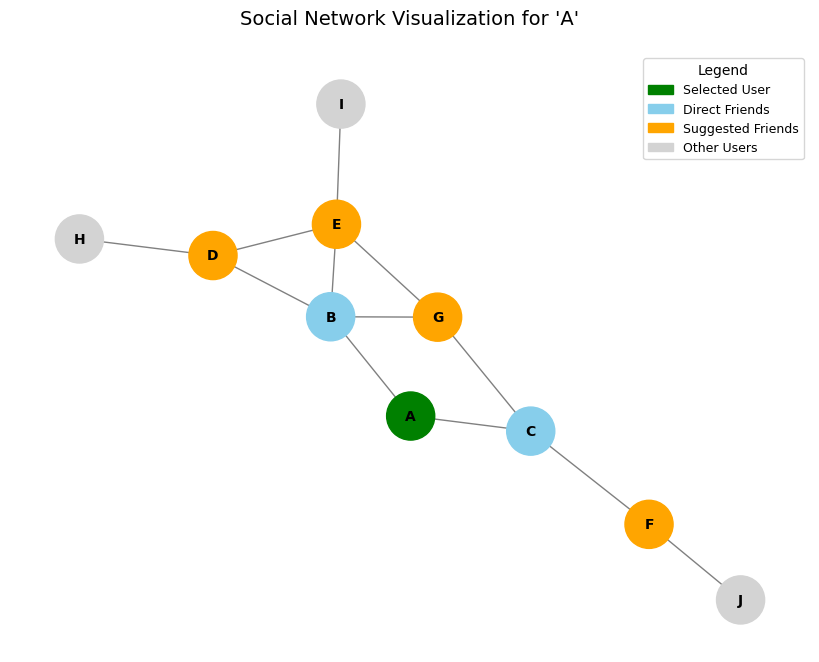

In [21]:
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

# --------------------------
# 1) Graph Construction
# --------------------------
def build_graph(edges):
    graph = defaultdict(set)
    for u, v in edges:
        graph[u].add(v)
        graph[v].add(u)
    return graph


# --------------------------
# 2) BFS Friend Suggestion
# --------------------------
def suggest_friends_bfs(graph, user, max_depth=2):
    if user not in graph:
        return []

    visited = set([user])
    queue = deque([(user, 0)])
    mutual_count = defaultdict(int)

    while queue:
        node, depth = queue.popleft()
        if depth >= max_depth:
            continue

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, depth + 1))

            # if this is a friend-of-friend (depth == 1)
            if depth == 1 and neighbor not in graph[user] and neighbor != user:
                mutual_count[neighbor] += 1

    # Sort by highest mutual friend count
    suggestions = sorted(mutual_count.items(), key=lambda x: (-x[1], x[0]))
    return suggestions


# --------------------------
# 3) Visualization with Legend
# --------------------------
def visualize_graph(graph, user, suggestions):
    G = nx.Graph()
    for node in graph:
        for neighbor in graph[node]:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42)

    node_colors = []
    for node in G.nodes():
        if node == user:
            node_colors.append("green")
        elif node in graph[user]:
            node_colors.append("skyblue")
        elif any(node == cand for cand, _ in suggestions):
            node_colors.append("orange")
        else:
            node_colors.append("lightgray")


    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=1200,
        font_size=10,
        font_weight="bold",
        edge_color="gray"
    )

    legend_patches = [
        mpatches.Patch(color='green', label='Selected User'),
        mpatches.Patch(color='skyblue', label='Direct Friends'),
        mpatches.Patch(color='orange', label='Suggested Friends'),
        mpatches.Patch(color='lightgray', label='Other Users'),
    ]
    plt.legend(
        handles=legend_patches,
        title="Legend",
        loc="upper right",
        fontsize=9,
        title_fontsize=10,
        frameon=True,
        facecolor="white"
    )

    plt.title(f"Social Network Visualization for '{user}'", fontsize=14, pad=20)
    plt.show()


# --------------------------
# 4) Run Example
# --------------------------
if __name__ == "__main__":
    edges = [
        ("A", "B"), ("A", "C"),
        ("B", "D"), ("B", "E"),
        ("C", "F"), ("C", "G"),
        ("D", "H"), ("E", "I"),
        ("F", "J"),
        ("D", "E"), ("E", "G"), ("B", "G")
    ]

    graph = build_graph(edges)
    user = "A"
    suggestions = suggest_friends_bfs(graph, user)

    print("Adjacency List:")
    for node in sorted(graph):
        print(f"  {node}: {sorted(graph[node])}")

    print(f"\nFriend Suggestions for '{user}':")
    if not suggestions:
        print("  No suggestions found.")
    else:
        for friend, mutuals in suggestions:
            print(f"  {friend} (mutual friends: {mutuals})")

    visualize_graph(graph, user, suggestions)


# **Analysis:**

This problem represents users as nodes and friendships as undirected edges. The Breadth-First Search (BFS) algorithm is used to explore the social graph level by level to find “friends of friends” who are not directly connected. The algorithm efficiently identifies mutual connections and can suggest new friends based on shared social links.

# **Complexity:**

**Time Complexity:** O(V + E) – each vertex and edge is traversed once.

**Space Complexity:** O(V + E) – for adjacency list and visited tracking.






# ***Problem 2: Route Finding on Google Maps***

**Graph Algorithm:** Bellman-Ford

**Real-World Application:** Navigation systems

**Objective:** Find shortest path from source to all nodes, even if some edge weights are negative.

In [24]:
def bellman_ford(graph_edges, vertices, source):
    # Step 1: Initialize distances
    dist = {v: float('inf') for v in vertices}
    dist[source] = 0

    # Step 2: Relax edges |V| - 1 times
    for _ in range(len(vertices) - 1):
        for u, v, w in graph_edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    # Step 3: Check for negative weight cycles
    for u, v, w in graph_edges:
        if dist[u] != float('inf') and dist[u] + w < dist[v]:
            print("⚠️ Negative weight cycle detected!")
            return None

    return dist


In [25]:
# Define edges as (source_city, destination_city, weight)
edges = [
    ('A', 'B', 6),
    ('A', 'C', 5),
    ('A', 'D', 5),
    ('B', 'E', -1),
    ('C', 'B', -2),
    ('C', 'E', 1),
    ('D', 'C', -2),
    ('D', 'F', -1),
    ('E', 'G', 3),
    ('F', 'G', 3)
]

# Define all cities (vertices)
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
source = 'A'


In [26]:
distances = bellman_ford(edges, vertices, source)

if distances:
    print(f"Shortest distances from source city '{source}':")
    for city, distance in distances.items():
        print(f"  {source} → {city}: {distance}")


Shortest distances from source city 'A':
  A → A: 0
  A → B: 1
  A → C: 3
  A → D: 5
  A → E: 0
  A → F: 4
  A → G: 3


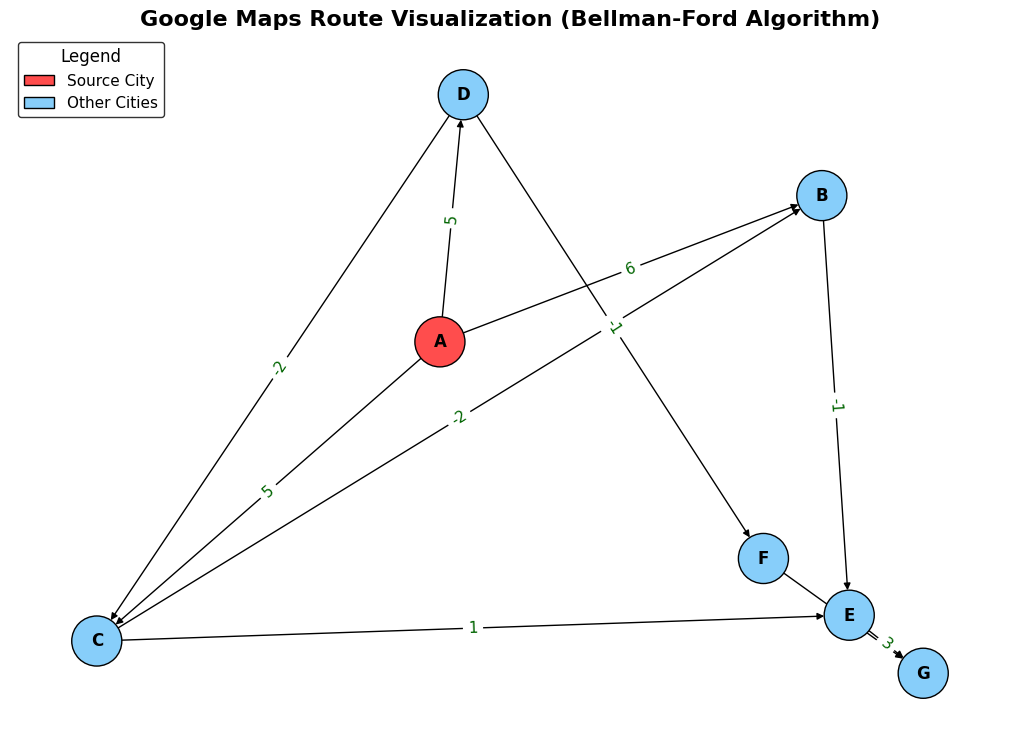

In [28]:
# -------------------------------------------------------------
# Graph Visualization for Route Finding (Bellman-Ford)
# -------------------------------------------------------------
def visualize_graph(edges, distances, source):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)

    pos = nx.spring_layout(G, seed=42)

    node_colors = []
    for node in G.nodes():
        if node == source:
            node_colors.append('#ff4d4d')
        else:
            node_colors.append('#87CEFA')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            node_size=1300, edgecolors='black', font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkgreen', font_size=11)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#ff4d4d', edgecolor='black', label='Source City'),
        Patch(facecolor='#87CEFA', edgecolor='black', label='Other Cities')
    ]
    plt.legend(handles=legend_elements, title="Legend", loc='upper left',
               fontsize=11, title_fontsize=12, frameon=True, facecolor='white', edgecolor='black')

    plt.title("Google Maps Route Visualization (Bellman-Ford Algorithm)", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

# Call visualization
if distances:
    visualize_graph(edges, distances, source)


# **Analysis:**

This problem models cities as nodes and roads as directed weighted edges.
The Bellman-Ford algorithm is used to compute the shortest path from a given source city (A) to all others.
It supports negative edge weights, which could represent real-world factors like toll discounts, downhill routes, or special conditions.
Unlike Dijkstra’s Algorithm, Bellman-Ford can handle graphs with negative edges and detect negative weight cycles.

# **Complexity:**

**Time Complexity:** O(V × E) → Every edge is relaxed |V| − 1 times.

**Space Complexity:** O(V) → To store distance values for all cities

# ***Problem 3: Emergency Response System***

**Graph Algorithm:** Dijkstra’s Algorithm

**Real-World Application:** Disaster Management

**Objective:** Identify the fastest route for emergency vehicles in a weighted city map (all weights positive).

Shortest Distances from A:
A → A: 0 (Path: A)
A → B: 4 (Path: A → B)
A → C: 2 (Path: A → C)
A → D: 9 (Path: A → C → E → D)
A → E: 5 (Path: A → C → E)
A → F: 10 (Path: A → C → E → F)


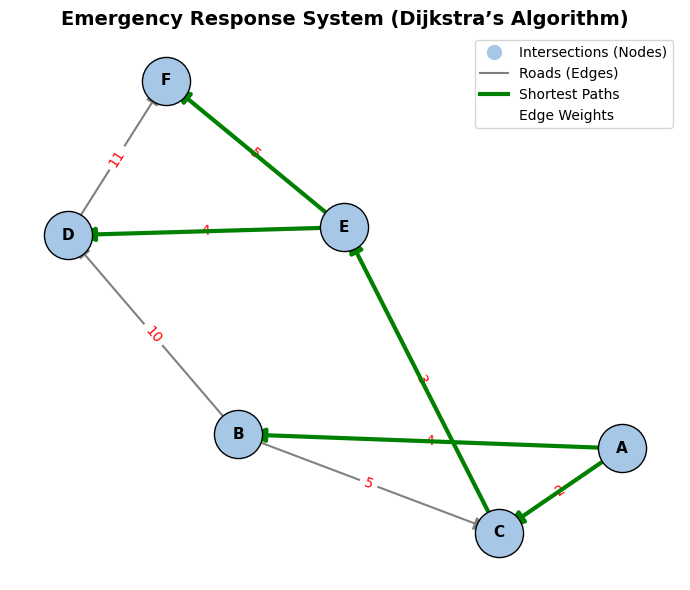

In [40]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --------------------------
# Step 1: Graph Modeling
# --------------------------
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 5, 'D': 10},
    'C': {'E': 3},
    'D': {'F': 11},
    'E': {'D': 4, 'F': 5},
    'F': {}
}

# --------------------------
# Step 2: Dijkstra’s Algorithm
# --------------------------
def dijkstra(graph, start):
    pq = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))
    return distances, previous

distances, previous = dijkstra(graph, 'A')

# --------------------------
# Step 3: Extract shortest paths
# --------------------------
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

paths = {node: get_path(previous, node) for node in graph}

print("Shortest Distances from A:")
for node, dist in distances.items():
    print(f"A → {node}: {dist} (Path: {' → '.join(paths[node])})")

# --------------------------
# Step 4: Visualization
# --------------------------
G = nx.DiGraph()
for node in graph:
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)

# Increase spacing between nodes (k=1.5)
pos = nx.spring_layout(G, seed=42, k=1.5)

plt.figure(figsize=(7, 6))
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw base network
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='#A7C7E7', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray', arrows=True, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Highlight shortest path edges
shortest_edges = set()
for node in graph:
    path = paths[node]
    for i in range(len(path) - 1):
        shortest_edges.add((path[i], path[i + 1]))

nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, width=3, edge_color='green', arrows=True, arrowsize=20)

legend_elements = [
    Line2D([0], [0], color='#A7C7E7', marker='o', markersize=10, linestyle='None', label='Intersections (Nodes)'),
    Line2D([0], [0], color='gray', lw=1.5, label='Roads (Edges)'),
    Line2D([0], [0], color='green', lw=3, label='Shortest Paths'),
    Line2D([0], [0], color='red', lw=0, marker=' ', label='Edge Weights')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title("Emergency Response System (Dijkstra’s Algorithm)", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()



# **Analysis:**

This problem models intersections as nodes and roads as weighted edges, where the weight represents travel time between two intersections.
The Dijkstra’s algorithm is used to compute the shortest travel time from the emergency station (source) to all other intersections in the city.
It uses a min-heap (priority queue) to always pick the next intersection with the smallest known distance, ensuring an optimal and efficient pathfinding process.

# **Complexity:**

**Time Complexity:** O(E log V) — each edge relaxation operation takes log V due to the priority queue.

**Space Complexity:** O(V + E) — adjacency list and distance storage.

# ***Problem 4: Network Cable Installation***

**Graph Algorithm:** Minimum Spanning Tree (Prim’s Algorithm or Kruskal’s)

**Real-World Application:** Telecom & IT Infrastructure

**Objective:** Connect all offices/nodes with the minimum total length of cable.

Prim's MST Edges:
A -- C (Cost: 2)
C -- D (Cost: 3)
D -- E (Cost: 1)
A -- B (Cost: 4)
Total Cost (Prim's): 10

Kruskal's MST Edges:
D -- E (Cost: 1)
A -- C (Cost: 2)
C -- D (Cost: 3)
A -- B (Cost: 4)
Total Cost (Kruskal's): 10



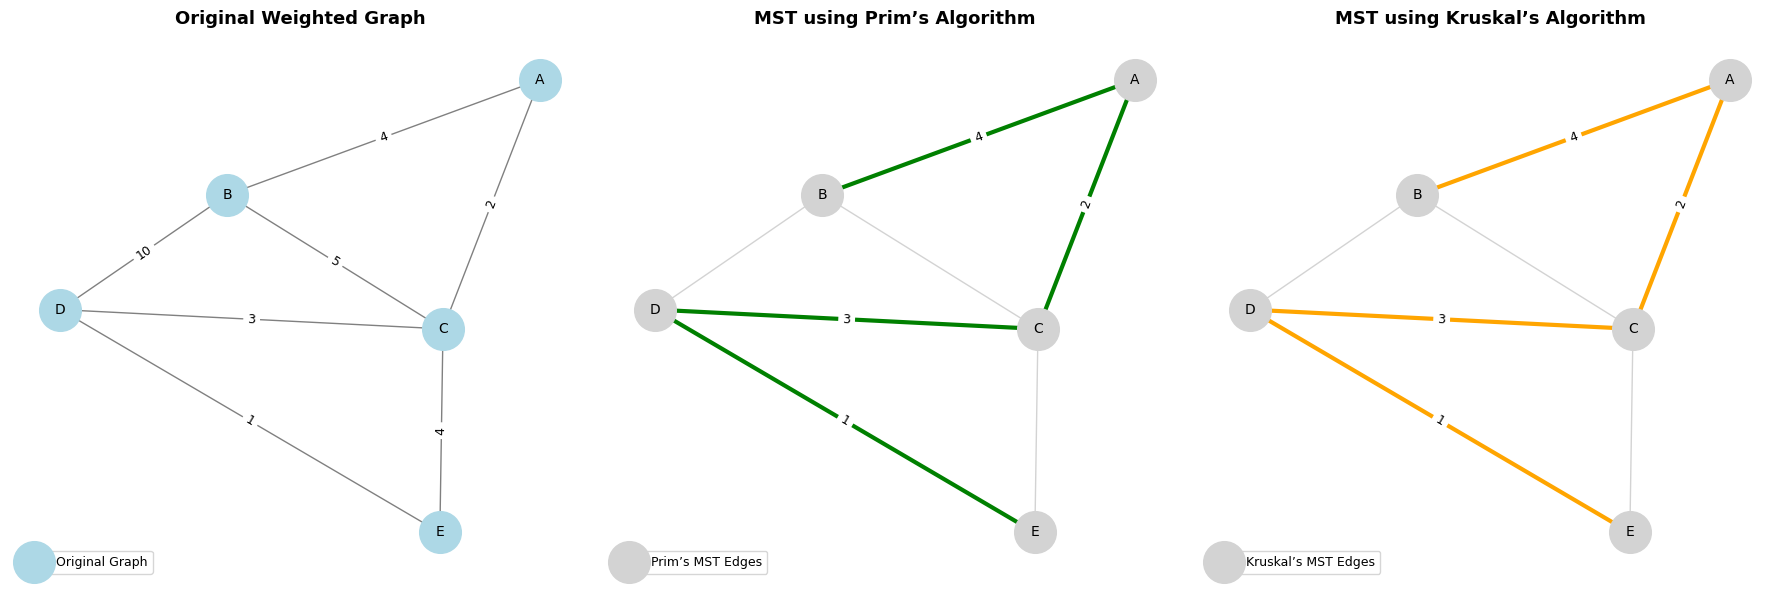

In [44]:

# Step 1: Required Libraries
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Graph Modeling (Undirected Weighted Graph)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 4},
    'D': {'B': 10, 'C': 3, 'E': 1},
    'E': {'C': 4, 'D': 1}
}

# Step 3: Prim’s Algorithm
def prim_mst(graph, start):
    visited = set()
    min_heap = [(0, start, None)]
    mst_edges = []
    total_cost = 0

    while min_heap:
        weight, current, parent = heapq.heappop(min_heap)
        if current in visited:
            continue
        visited.add(current)
        total_cost += weight
        if parent:
            mst_edges.append((parent, current, weight))

        for neighbor, w in graph[current].items():
            if neighbor not in visited:
                heapq.heappush(min_heap, (w, neighbor, current))
    return mst_edges, total_cost


# Step 4: Kruskal’s Algorithm
def kruskal_mst(graph):
    edges = []
    for u in graph:
        for v, w in graph[u].items():
            if (v, u, w) not in edges:  # avoid duplicates
                edges.append((u, v, w))
    edges.sort(key=lambda x: x[2])  # sort by weight

    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            elif rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            else:
                parent[root_v] = root_u
                rank[root_u] += 1

    for node in graph:
        parent[node] = node
        rank[node] = 0

    mst_edges = []
    total_cost = 0
    for u, v, w in edges:
        if find(u) != find(v):
            union(u, v)
            mst_edges.append((u, v, w))
            total_cost += w

    return mst_edges, total_cost


# Step 5: Run Both Algorithms
prim_edges, prim_cost = prim_mst(graph, 'A')
kruskal_edges, kruskal_cost = kruskal_mst(graph)

print("Prim's MST Edges:")
for u, v, w in prim_edges:
    print(f"{u} -- {v} (Cost: {w})")
print(f"Total Cost (Prim's): {prim_cost}\n")

print("Kruskal's MST Edges:")
for u, v, w in kruskal_edges:
    print(f"{u} -- {v} (Cost: {w})")
print(f"Total Cost (Kruskal's): {kruskal_cost}\n")


# Step 6: Visualization (Original Graph, Prim's MST, Kruskal's MST)
G = nx.Graph()
for u in graph:
    for v, w in graph[u].items():
        G.add_edge(u, v, weight=w)

MST_Prim = nx.Graph()
for u, v, w in prim_edges:
    MST_Prim.add_edge(u, v, weight=w)

MST_Kruskal = nx.Graph()
for u, v, w in kruskal_edges:
    MST_Kruskal.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(18, 6))

# --- Original Graph ---
plt.subplot(1, 3, 1)
plt.title("Original Weighted Graph", fontsize=13, fontweight='bold')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=900, edge_color='gray', font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=9)
plt.legend(["Original Graph"], loc="lower left", fontsize=9, frameon=True, facecolor='white')

# --- Prim’s MST ---
plt.subplot(1, 3, 2)
plt.title("MST using Prim’s Algorithm", fontsize=13, fontweight='bold')
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=900, edge_color='lightgray', font_size=10)
nx.draw_networkx_edges(MST_Prim, pos, width=3, edge_color='green')
nx.draw_networkx_edge_labels(MST_Prim, pos, edge_labels=nx.get_edge_attributes(MST_Prim, 'weight'), font_size=9)
plt.legend(["Prim’s MST Edges"], loc="lower left", fontsize=9, frameon=True, facecolor='white')

# --- Kruskal’s MST ---
plt.subplot(1, 3, 3)
plt.title("MST using Kruskal’s Algorithm", fontsize=13, fontweight='bold')
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=900, edge_color='lightgray', font_size=10)
nx.draw_networkx_edges(MST_Kruskal, pos, width=3, edge_color='orange')
nx.draw_networkx_edge_labels(MST_Kruskal, pos, edge_labels=nx.get_edge_attributes(MST_Kruskal, 'weight'), font_size=9)
plt.legend(["Kruskal’s MST Edges"], loc="lower left", fontsize=9, frameon=True, facecolor='white')

plt.tight_layout()
plt.show()


# **Analysis**

This problem simulates a telecom or IT network installation, where each node is an office building and each weighted edge represents the cost of connecting two offices via cable. The goal is to minimize the total cable cost — an ideal use case for Minimum Spanning Tree (MST) algorithms.

# **Complexity**

| Algorithm     | Time Complexity         | Space Complexity | Data Structure Used |
| ------------- | ----------------------- | ---------------- | ------------------- |
| **Prim’s**    | O(E log V)              | O(V + E)         | Min-Heap            |
| **Kruskal’s** | O(E log E) ≈ O(E log V) | O(V + E)         | Union-Find          |


